# Advance Visualization

Installation:
`pip install folium wordcloud seaborn Pillow`

In [1]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

## Data Loading & Preprocessing

In [2]:
df_canada = pd.read_excel(
    "data/Canada.xlsx",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2
)
df_canada.drop(
    columns=["Type", "Coverage", "AREA", "REG", "DEV"],
    inplace=True
)
df_canada.rename(
    columns={
        "OdName": "Country",
        "AreaName": "Continent",
        "RegName": "Region",
        "DevName": "Dev"
    },
    inplace=True
)
df_canada["Total"] = df_canada.select_dtypes(
    "number"
).sum(axis=1)
df_canada.set_index("Country", inplace=True)

In [3]:
df_canada.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Pie Charts

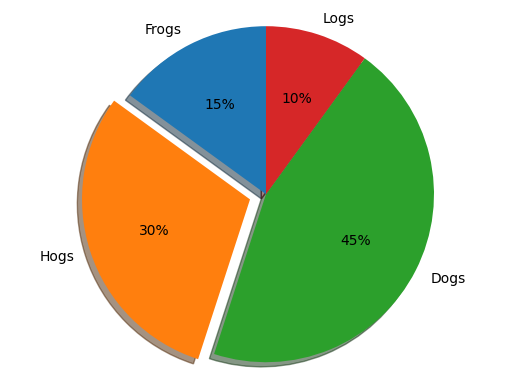

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.0f%%',
    shadow=True,
    startangle=90
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

> How is the distribution of number of immigrants for each continent?

In [16]:
df_continents = df_canada.groupby("Continent").sum()
df_continents

/var/folders/93/ql5vn23d6c7bs3rnsd0z7q8c0000gn/T/ipykernel_74993/3198697178.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_canada.groupby("Continent").sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [18]:
df_continents.Total.values

array([ 618948, 3317794, 1410947,  765148,  241142,   55174])

In [20]:
df_continents.index.tolist()

['Africa',
 'Asia',
 'Europe',
 'Latin America and the Caribbean',
 'Northern America',
 'Oceania']

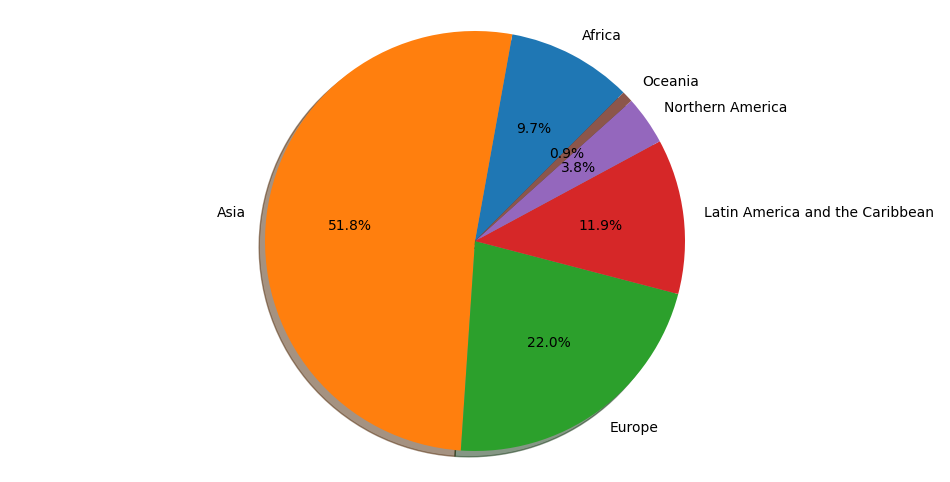

In [21]:
plt.figure(figsize=(12, 6))
plt.pie(
    df_continents.Total.values,
    labels=df_continents.index.tolist(),
    autopct="%.1f%%",
    shadow=True,
    startangle=45,
)
plt.axis("equal")
plt.show()

Adding story by focusing on certain continents..

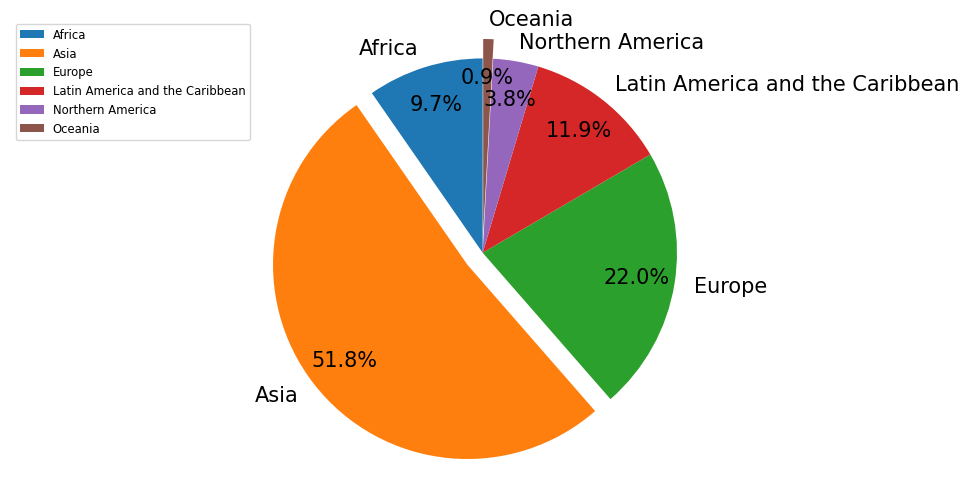

In [29]:
plt.figure(figsize=(12, 6))
plt.pie(
    df_continents.Total.values,
    labels=df_continents.index.tolist(),
    explode=[0, .1, 0, 0, 0, .1],
    autopct="%.1f%%",
    pctdistance=.8,
    startangle=90,
    textprops={"fontsize": 15}
)
plt.legend(df_continents.index.tolist(), loc="upper left", fontsize="small")
plt.axis("equal")
plt.show()

> Using pie chart, how many percentage of immigrants does Asia contribute in 2013?

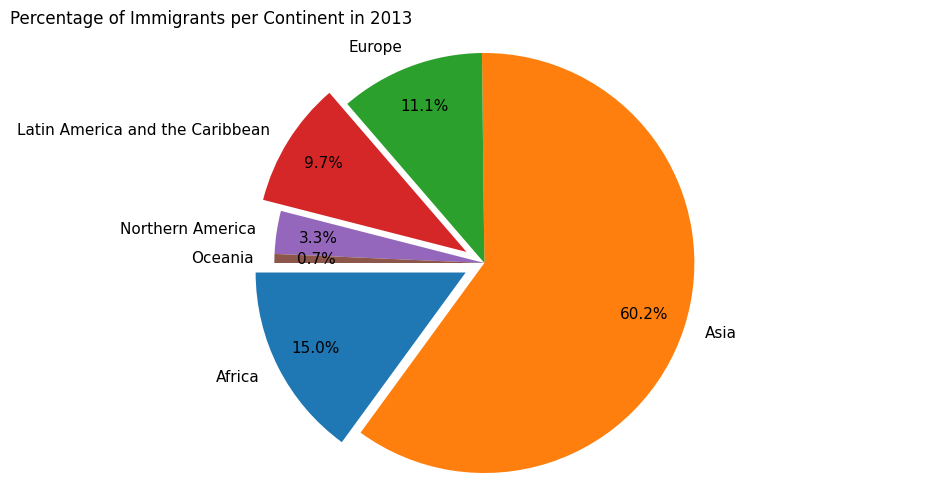

In [36]:
# your solution
plt.figure(figsize=(12, 6))
plt.pie(
    df_continents[2013].values,
    labels=df_continents.index.tolist(),
    explode=[0.1, 0, 0, .1, 0, 0],
    autopct="%.1f%%",
    pctdistance=.8,
    startangle=180,
    textprops={"fontsize": 11}
)
plt.title("Percentage of Immigrants per Continent in 2013", loc="left")
plt.axis("equal")
plt.show()

## Subplots

With subplots, we can create **multiple plots/axis** in **1 figure**.

<div align="center">
    <img src="https://matplotlib.org/stable/_images/anatomy.png" width=50%/>
</div>

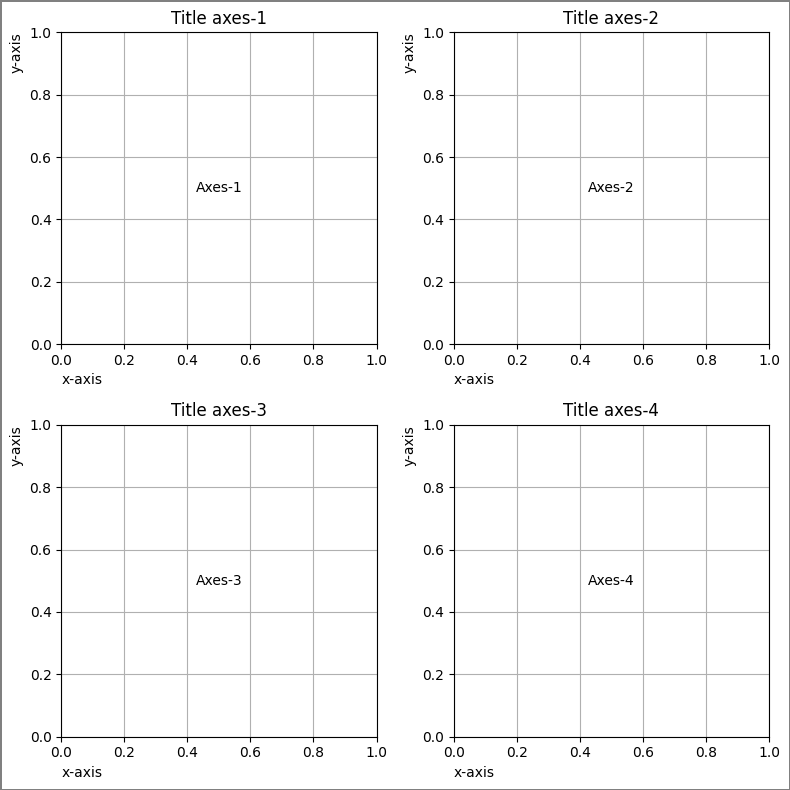

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True, linewidth=1, edgecolor="gray")
for idx, ax in enumerate(axes.flat):
    ax.grid(True)
    ax.set_ylabel("y-axis", loc="top")
    ax.set_xlabel("x-axis", loc="left")
    ax.annotate(
        f"Axes-{idx+1}",
        (.5, .5),
        va="center",
        ha="center"
    )
    ax.set_title(f"Title axes-{idx+1}")
plt.show()

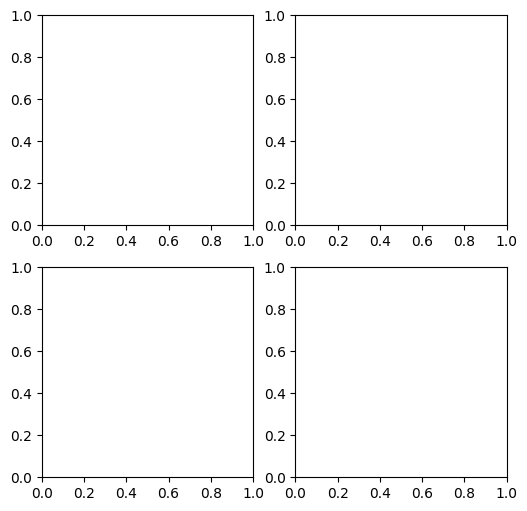

In [43]:
plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.subplot(222)
plt.subplot(223)
plt.subplot(224)
plt.show()

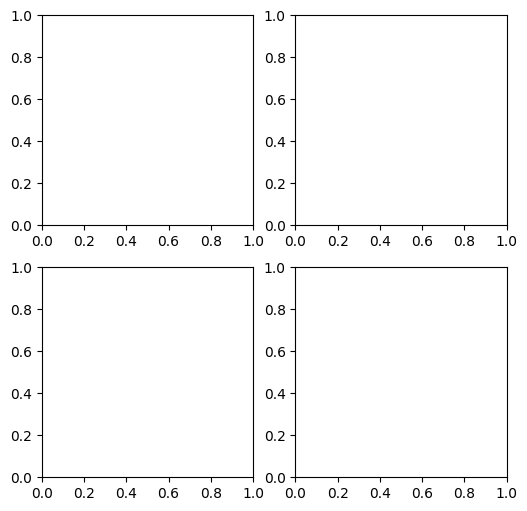

In [44]:
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(221)
fig.add_subplot(222)
fig.add_subplot(223)
fig.add_subplot(224)
plt.show()

In [45]:
df_china_india = df_canada.loc[["India", "China"], range(1980, 2014)].transpose()
df_china_india.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


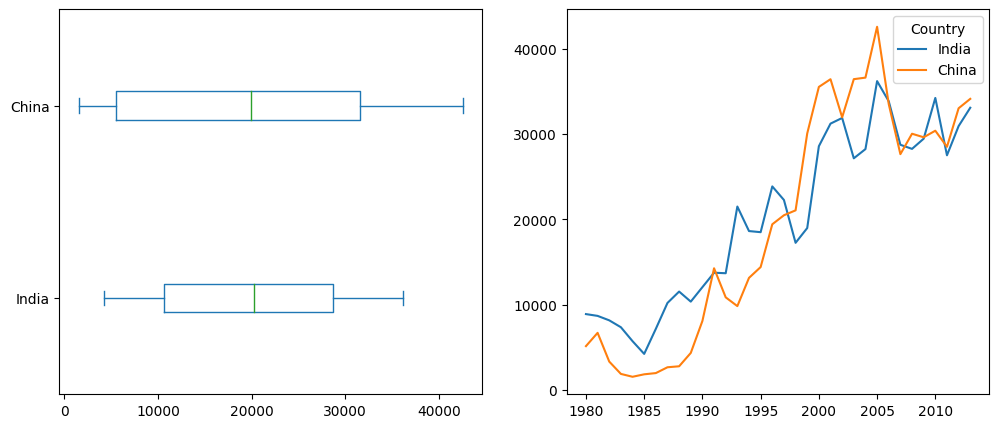

In [46]:
plt.figure()
ax1 = plt.subplot(121)
df_china_india.plot(
    kind="box",
    figsize=(12, 5),
    vert=False,
    ax=ax1
)
ax2 = plt.subplot(122)
df_china_india.plot(
    kind="line",
    figsize=(12, 5),
    ax=ax2
)
plt.show()

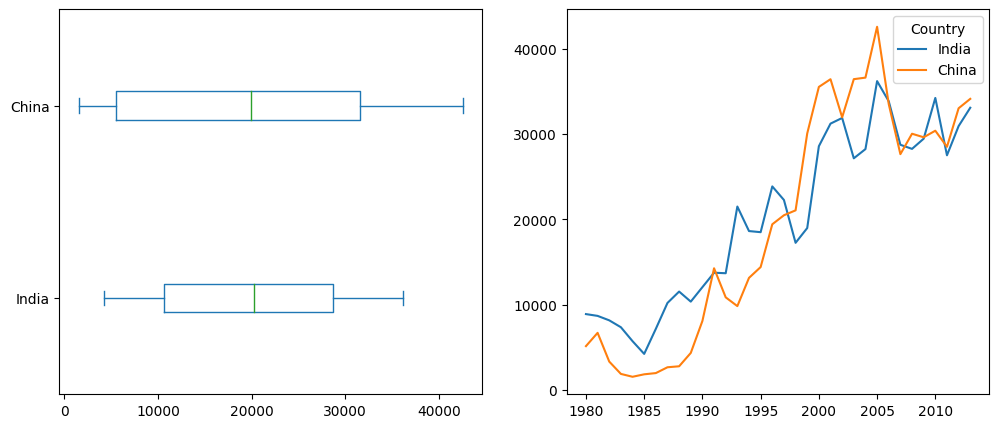

In [49]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
df_china_india.plot(
    kind="box",
    vert=False,
    ax=ax1
)
ax2 = fig.add_subplot(122)
df_china_india.plot(
    kind="line",
    ax=ax2
)
plt.show()

## Word Clouds

To create word cloud, you need a passage. You can have one from any text file.

For example, use this [alice novel](https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt).

### Word Cloud for Alice Novel

In [50]:
with open("data/alice_novel.txt", "r") as f:
    alice = f.read()

In [52]:
print(alice[719:2000])

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but when the Rabbit actually TOOK A WATCH
OUT OF ITS WAISTCOAT-POCKET, and looked at it, and t

In [53]:
print(STOPWORDS)

{'would', 'its', 'by', 'it', 'these', 'that', "why's", "who's", 'an', 'all', "didn't", 'or', 'were', "you've", 'having', 'not', "isn't", 'very', 'what', 'why', 'ought', 'our', 'her', 'at', 'during', "wasn't", "we'd", 'does', 'their', "they'd", "how's", 'yourselves', 'theirs', 'on', "can't", 'ever', "weren't", 'they', 'could', 'no', 'then', 'i', "they'll", 'doing', 'than', 'herself', 'same', 'cannot', 'between', 'being', 'can', 'do', 'too', "i'm", 'me', "don't", "when's", 'about', 'both', "you're", 'ours', "she'd", 'your', "what's", 'yours', "here's", 'my', 'com', "he'd", "he's", 'most', "it's", 'should', 'is', "hasn't", 'was', "mustn't", 'been', 'therefore', 'we', 'as', 'had', 'ourselves', "she'll", "shan't", 'did', 'few', 'more', 'r', 'such', "won't", 'there', 'however', 'www', 'out', 'any', 'other', 'when', 'here', 'else', 'own', 'you', 'because', 'http', 'she', 'through', 'to', "i've", 'above', 'if', 'off', 'this', "you'll", 'for', 'the', 'who', "we'll", 'since', 'before', 'how', 'i

We want to know what the novel is about using the novel text data. Here, we'll use WordCloud.

In [54]:
# define stopwords variable
stopwords = STOPWORDS.copy()

# define the wordcloud
alice_wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=stopwords
)

In [55]:
alice_wordcloud.generate(alice[719:])

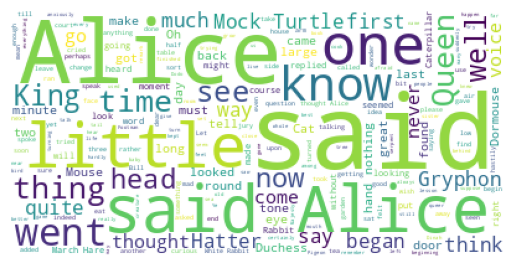

In [58]:
plt.imshow(alice_wordcloud)
plt.axis("off")
plt.show()

The `said` word looks like can be removed since it means nothing. To do this, we could add the word to the `stopwords` variable that has been passed into the wordcloud.

In [59]:
"said" in stopwords

False

In [60]:
"said" in STOPWORDS

False

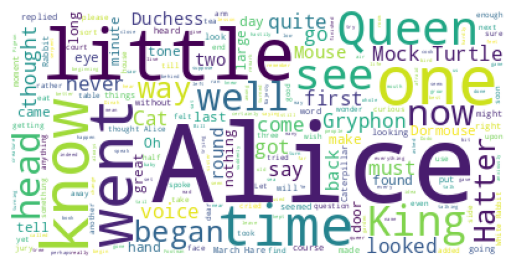

In [61]:
stopwords.add("said")
stopwords.add("much")
stopwords.add("thing")
stopwords.add("think")
alice_wordcloud.generate(alice[719:])

plt.imshow(alice_wordcloud)
plt.axis("off")
plt.show()

In [62]:
"said" in stopwords

True

Now, there's no word `said` in the wordcloud now.

We also can use images as the background of the word cloud.

In [63]:
alice_mask = Image.open("data/alice.jpg")

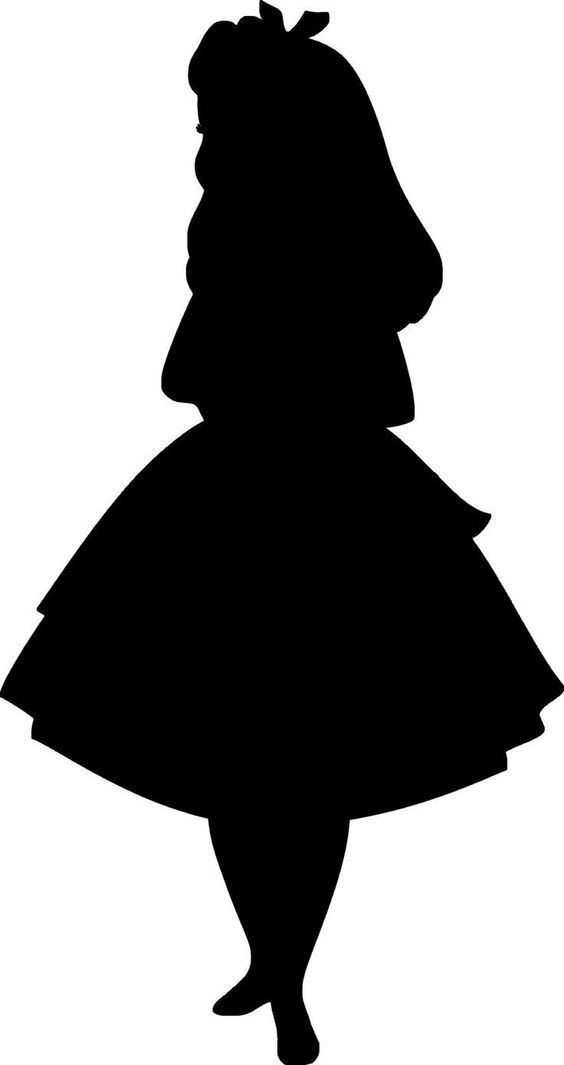

In [64]:
alice_mask

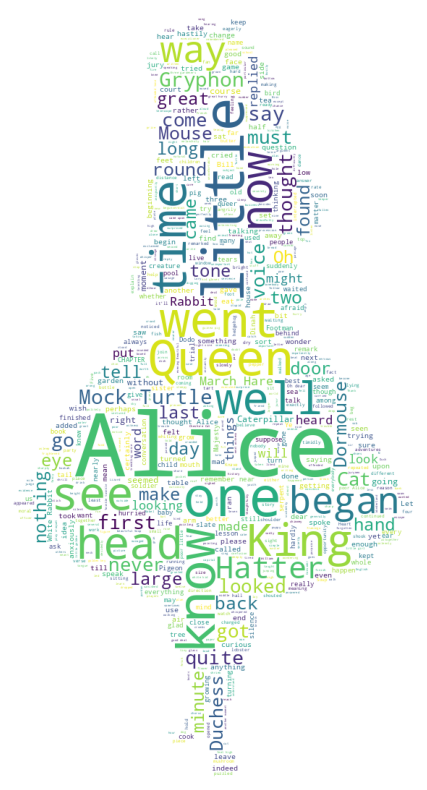

In [66]:
# define background mask
np_alice_mask = np.array(alice_mask)

# define wordcloud
alice_wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=stopwords,
    mask=np_alice_mask
)

# generate word cloud
alice_wordcloud.generate(alice[719:])

plt.figure(figsize=(6, 10))
plt.imshow(alice_wordcloud)
plt.axis("off")
plt.show()

### Word Cloud for Tabular Data

Since word cloud is text-based visualization, we need text data. Unfortunately, tabular data is a structured one. Hence, if we want to create a word cloud for tabular data, we need to do some preprocessing.

For example, we want to create a word cloud to represent immigrants origin country. The higher number of immigrants from that country the larger the word of that country in the word cloud.

How do we do that?

In [67]:
total_immigration = df_canada["Total"].sum()
print(f"Total immigration: {total_immigration:,}")

Total immigration: 6,409,153


From the total immigration, we will create a word cloud with the origin country based on their percentage to the total immigration. Specifically, we'll generate more duplicates for higher percentage.

In [73]:
max_words = 1000
words = ""
for country in df_canada.index.values:
    repeat = int(max_words * df_canada.loc[country, "Total"] / total_immigration)
    words += (country + " ") * repeat

In [74]:
words

"Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium Bosnia and Herzegovina Bosnia and Herzegovina Bosnia and Herzegovina Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Chi

In [77]:
wordcloud = WordCloud(
    background_color="white",
    collocations=False
)
wordcloud.generate(words)

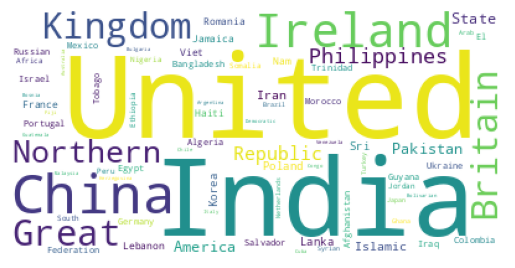

In [78]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

> **Tips
> For better and consistent visualizations, transform country with multiple keywords into one word**

## Visualization with Seaborn

Seaborn is python visualization tools that utilizes matplotlib. Every visualizations from seaborn is configurable using matplotlib settings.

> **Seaborn is considered more straightforward than matplotlib**

In [79]:
years = range(1980, 2014)
df_yearly_total = pd.DataFrame(
    df_canada[years].sum(axis=0), columns=["total"]
).reset_index(names="year")
df_yearly_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


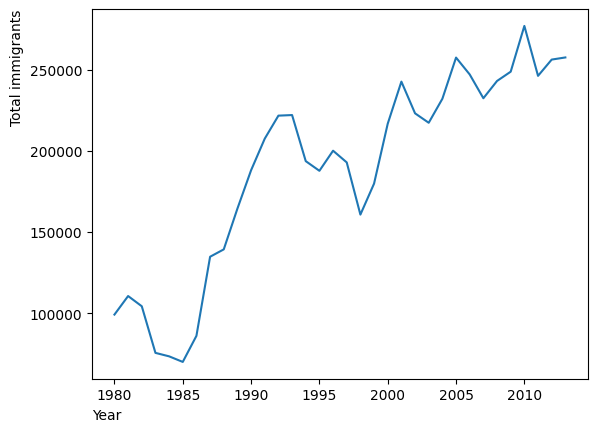

In [80]:
sns.lineplot(
    data=df_yearly_total,
    x="year",
    y="total",
)
plt.xlabel("Year", loc="left")
plt.ylabel("Total immigrants", loc="top")
plt.show()

### Regression Plot

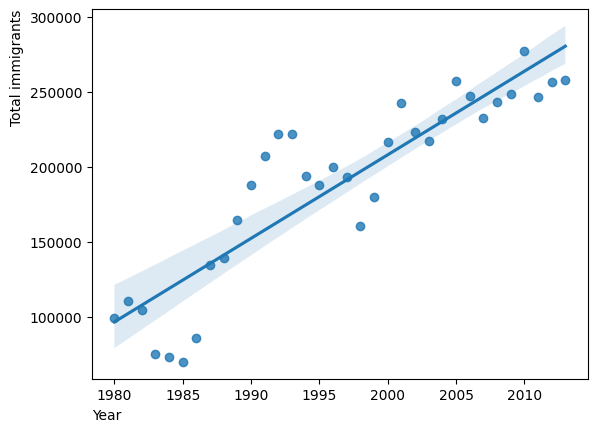

In [81]:
sns.regplot(
    data=df_yearly_total,
    x="year", y="total"
)
plt.xlabel("Year", loc="left")
plt.ylabel("Total immigrants", loc="top")
plt.show()

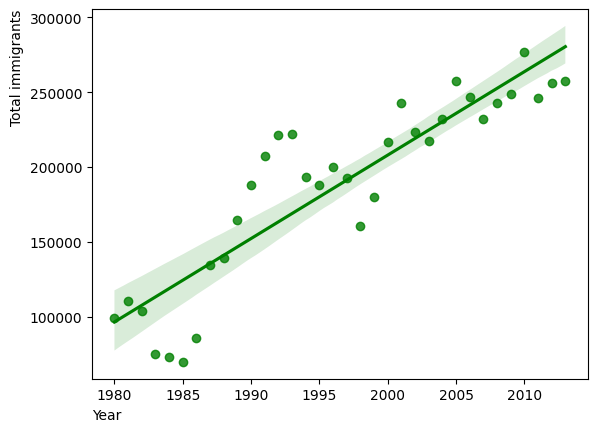

In [82]:
sns.regplot(
    data=df_yearly_total,
    x="year", y="total",
    color="green"
)
plt.xlabel("Year", loc="left")
plt.ylabel("Total immigrants", loc="top")
plt.show()

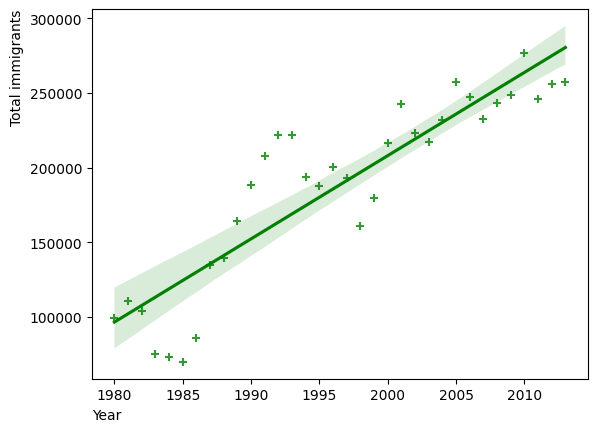

In [89]:
sns.regplot(
    data=df_yearly_total,
    x="year", y="total",
    color="green",
    marker="+"
)
plt.xlabel("Year", loc="left")
plt.ylabel("Total immigrants", loc="top")
plt.show()

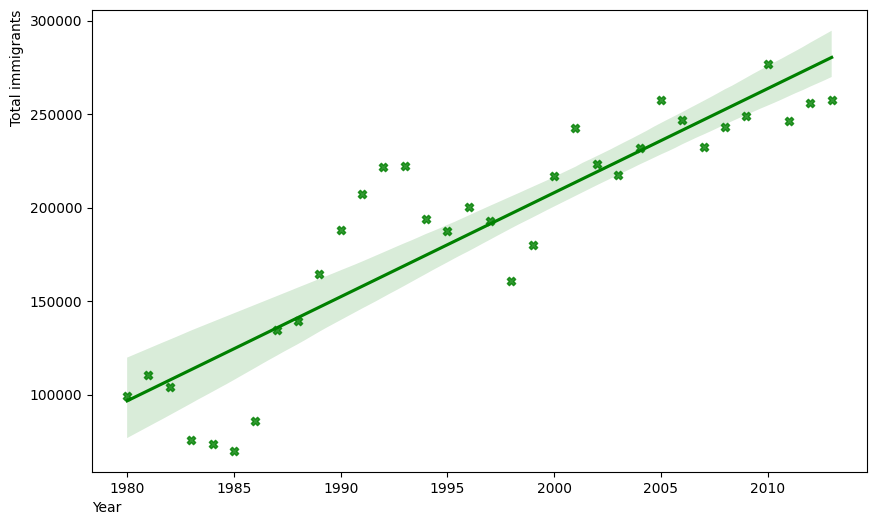

In [92]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_yearly_total,
    x="year", y="total",
    color="green",
    marker="X"
)
plt.xlabel("Year", loc="left")
plt.ylabel("Total immigrants", loc="top")
plt.show()

## Map Visualization with Folium

In [93]:
world_map = folium.Map()

In [94]:
world_map

In [97]:
jakarta = folium.Map(
    location=(-6.2297465, 106.829518),
    zoom_start=11
)
jakarta

### Different Style Map

**Stamen Toner**

In [98]:
jakarta = folium.Map(
    location=(-6.2297465,106.829518),
    zoom_start=11,
    tiles="Stamen Toner"
)
jakarta

In [99]:
jakarta = folium.Map(
    location=(-6.2297465,106.829518),
    zoom_start=11,
    tiles="Stamen Terrain"
)
jakarta

### Map with Marker

In [100]:
df_incidents = pd.read_csv("data/police_department_incidents.csv")

In [101]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [102]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [103]:
num_samples = 100
df_incidents_samples = df_incidents.loc[0:num_samples, :]

In [104]:
df_incidents_samples.shape

(101, 13)

In [105]:
# sf location
sf_loc = (37.77, -122.42)

# sf map
sf_map = folium.Map(
    location=sf_loc, zoom_start=12
)
sf_map

After visualizing the SF map, let's add some markers at the incident location.

In [106]:
# sf map
sf_map = folium.Map(
    location=sf_loc, zoom_start=12
)

# define a feature layer to add markers next
incidents = folium.map.FeatureGroup()

# loop through 1000 crimes
# add each of them to the map via feature group layer
for lat, long in df_incidents_samples[["Y", "X"]].values:
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color="yellow",
            fill=True,
            fill_color="red",
            fill_opacity=.7
        )
    )

sf_map.add_child(incidents)

We also could add a popup label whenever we click the marker by using `popup` parameter.

In [107]:
# sf map
sf_map = folium.Map(
    location=sf_loc, zoom_start=12
)

# define a feature layer to add markers next
incidents = folium.map.FeatureGroup()

# loop through 1000 crimes
# add each of them to the map via feature group layer
for lat, long, label in df_incidents_samples[["Y", "X", "Category"]].values:
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color="yellow",
            popup=label.title(),
            fill=True,
            fill_color="red",
            fill_opacity=.7
        )
    )

sf_map.add_child(incidents)

For better visual, we can add some **location markers** on top of the **circle markers**.

In [108]:
# sf map
sf_map = folium.Map(
    location=sf_loc, zoom_start=12
)

# define a feature layer to add markers next
incidents = folium.map.FeatureGroup()

# loop through 1000 crimes
# add each of them to the map via feature group layer
for lat, long, label in df_incidents_samples[["Y", "X", "Category"]].values:
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color="yellow",
            popup=label.title(),
            fill=True,
            fill_color="red",
            fill_opacity=.7
        )
    )
    incidents.add_child(
        folium.Marker(
            location=(lat, long),
            popup=label.title(),
        )
    )

sf_map.add_child(incidents)

Oops, some of the markers are stacked together and difficult to click on it. We can solve it by using a **plugins** from `folium` to cluster those markers close to each other.

In [109]:
# sf map
sf_map = folium.Map(
    location=sf_loc, zoom_start=12
)

# define a feature layer to add markers next
incidents = plugins.MarkerCluster()

# loop through 1000 crimes
# add each of them to the map via feature group layer
for lat, long, label in df_incidents_samples[["Y", "X", "Category"]].values:
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color="yellow",
            popup=label.title(),
            fill=True,
            fill_color="red",
            fill_opacity=.7
        )
    )
    incidents.add_child(
        folium.Marker(
            location=(lat, long),
            popup=label.title(),
        )
    )

sf_map.add_child(incidents)

### Choropleth

In [110]:
world_map = folium.Map(location=(0, 0), zoom_start=2)

choropleth = folium.Choropleth(
    geo_data="data/world_countries.json",
    data=df_canada.reset_index(),
    columns=["Country", "Total"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=.7,
    line_opacity=.2,
    legend_name="Immigration to Canada"
)
world_map.add_child(choropleth)

world_map